In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score 
from sklearn.metrics import confusion_matrix 

In [2]:
#read csv file and set encoding to 'latin-1' to remove error

misogyny = pd.read_csv("ManualTag_Misogyny.csv", encoding= 'latin-1')
misogyny

,Definition,is_misogyny
0,Ur gonna die... queer,0.0
1,Valuptuous man boobs.,0.0
2,Variation of brother.,0.0
3,Very impressive penis,0.0
4,What I call my penis.,0.0
...,...,...
2281,"A women who is ""easy""",1.0
2282,Any hot/ sexy chicks.,1.0
2283,Any vaginal secretion,1.0
2284,Person who slaps hoes,1.0


In [3]:
#check for null values in columns
misogyny.isna().sum()

Definition     0
is_misogyny    1
dtype: int64

In [4]:
#selecting value with missing categorisation

missing_cat = misogyny[misogyny['is_misogyny'].isna() ]
missing_cat
print(missing_cat['Definition'])

1251    When someone makes a post on Facebook and you ...
Name: Definition, dtype: object


In [5]:
#replacing NaN values with the appropriate category using numpy

misogyny = misogyny.replace(np.nan, 0.0)
misogyny.isna().sum()

Definition     0
is_misogyny    0
dtype: int64

In [6]:
#count the number of misogynistic posts vs non-misogynistic posts
misogyny.groupby('is_misogyny').count()

,Definition
is_misogyny,
0.0,1252
1.0,1034


In [7]:
#moves all punctuations and makes lowercase

cleaned_definition = pd.DataFrame(misogyny['Definition'].str.replace(r'[^\w\s]+' 
                                                        , ""))
cleaned_definition = cleaned_definition['Definition'].str.lower()
cleaned_definition

0          ur gonna die queer
1        valuptuous man boobs
2        variation of brother
3       very impressive penis
4        what i call my penis
                ...          
2281      a women who is easy
2282      any hot sexy chicks
2283    any vaginal secretion
2284    person who slaps hoes
2285       that hoe out there
Name: Definition, Length: 2286, dtype: object

In [8]:
misogyny['cleaned_definition'] = cleaned_definition
misogyny

,Definition,is_misogyny,cleaned_definition
0,Ur gonna die... queer,0.0,ur gonna die queer
1,Valuptuous man boobs.,0.0,valuptuous man boobs
2,Variation of brother.,0.0,variation of brother
3,Very impressive penis,0.0,very impressive penis
4,What I call my penis.,0.0,what i call my penis
...,...,...,...
2281,"A women who is ""easy""",1.0,a women who is easy
2282,Any hot/ sexy chicks.,1.0,any hot sexy chicks
2283,Any vaginal secretion,1.0,any vaginal secretion
2284,Person who slaps hoes,1.0,person who slaps hoes


In [9]:
misogyny.to_csv('misogyny')

In [10]:
#joining all strings from cleaned_definition into one giant string for WordCloud

cleaned_list = list(cleaned_definition)
cleaned_list = " ".join(cleaned_list)
cleaned_list

'ur gonna die queer valuptuous man boobs variation of brother very impressive penis what i call my penis what a real man eats what every man fears what i named my dick when a gay guy farts when a man ejaculates when a man jacks off when man gets a boner when two bros frolic when you gay and ugly whip it out a penis who the fuck is that who ate all the pies who cares its fake young bisexual male buttsex rearranged slang for lesbian cum bubble thera penis up the butt short dick syndrome a vampire brothel a babys vaginal lips a batty riders penis a beaner who is a fob a big jewish softcock a black persons cock a bonham w a 2 cock a bro taking a shower a bro who is retarded a broke mans cadillac a broken glass bottle a brown girls bosom a brown skined person a burnt severed penis a chineese black man  a codename for penis a complete cock block a complete homosexual a complex sexual move a damn sexy beast etc a dirty niggers cock a drizzle of gizcum a extremely gay thing a fag or a homosexu

In [11]:
#checking the parameters of WordCloud
?WordCloud

In [12]:
#generating the WordCloud object
wordcloud = WordCloud(background_color = 'white').generate(cleaned_list)

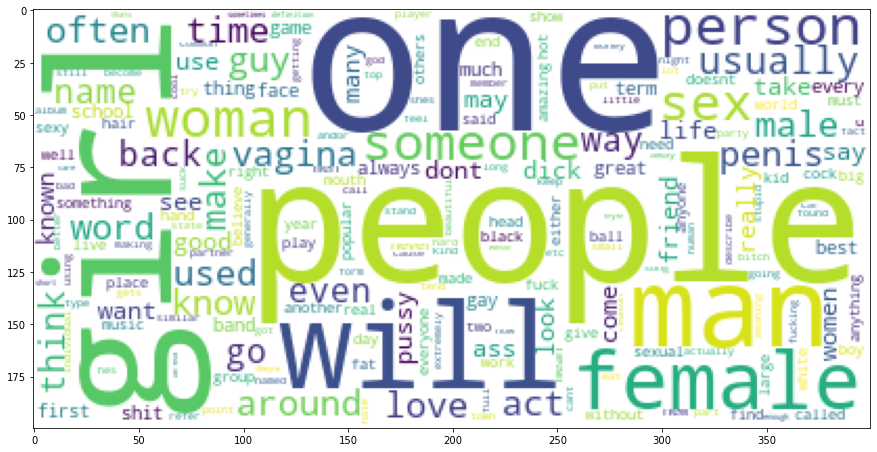

In [13]:
#plotting the WordCloud object and setting the size
plt.figure(figsize = (15,10))
plt.imshow(wordcloud)

In [14]:
#generating the WordCloud object
wordcloud1 = WordCloud(background_color = 'white', max_words = 50).generate(cleaned_list)

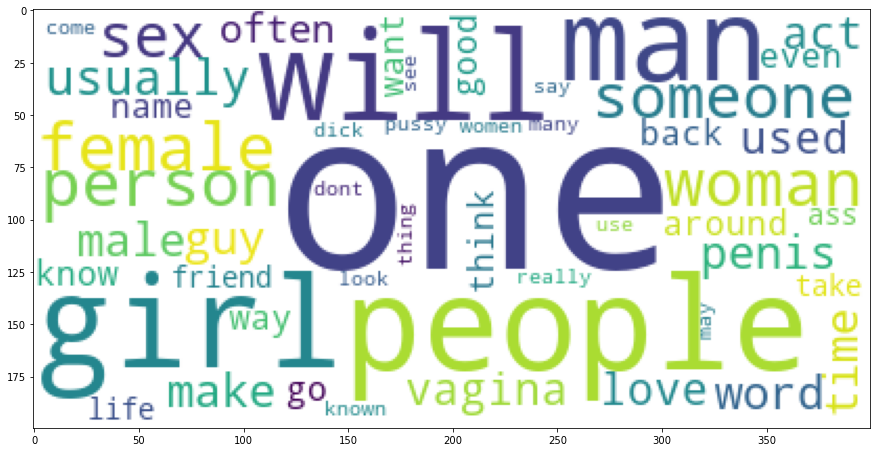

In [15]:
#plotting the WordCloud object and setting the size
plt.figure(figsize = (15,10))
plt.imshow(wordcloud1)

In [16]:
#splicing all values where text categorized as misogynistic

misogynistic = misogyny[misogyny['is_misogyny'] == True]


In [17]:
#splicing all values where text categorized as not misogynistic

not_misogynistic = misogyny[misogyny['is_misogyny'] == False]
not_misogynistic

,Definition,is_misogyny,cleaned_definition
0,Ur gonna die... queer,0.0,ur gonna die queer
1,Valuptuous man boobs.,0.0,valuptuous man boobs
2,Variation of brother.,0.0,variation of brother
3,Very impressive penis,0.0,very impressive penis
4,What I call my penis.,0.0,what i call my penis
...,...,...,...
1368,"Of or relating to a ""kill or be killed"" mental...",0.0,of or relating to a kill or be killed mentalit...
1370,"poser, 99% of the people that say they are g...",0.0,poser 99 of the people that say they are gan...
1371,I think youll find this describes Kanye pretty...,0.0,i think youll find this describes kanye pretty...
1372,Texas State University is THE university of ch...,0.0,texas state university is the university of ch...


In [18]:
#creating string to generate misogynistic WordCloud

misogynistic_string = " ".join(misogynistic['cleaned_definition'])
misogynistic_string

'slang for lesbian a babys vaginal lips a brown girls bosom a hoe or prostitute a meister of cunts a narcoleptic lesbian a smelly fucking cunt a suppressed lesbian a transexual grandma a transvestite hooker aka vaginal discharge angry lesbians united another word for cunt bring it on you cunts creamy vaginal fluids cunts  slags  clags dorm full of lesbians feminine of cockblock having to do with cum he who wears panties n a mexican lesbian short for crustycunt skank and cunt combo slippers for lesbians someone who is slutty southern word for cum synonym with cummed watever cunt fuck off yesyea in lesbianese in the world of bdsm practitioners a dominatrix refers to a person who primarily offers sexual services  but with a bdsm elementnnie a prostitute with a whipnnnot be confused with a prodomme  who offers bdsm services for a fee but not necessarily sexual services kind of a bitch she speaks too well and she lacks compassion for the homeless she may have a home but that doesnt make her

In [19]:
#generating misogynistic WordCloud object
m_wordcloud = WordCloud(background_color = "white", max_words = 50).generate(misogynistic_string)

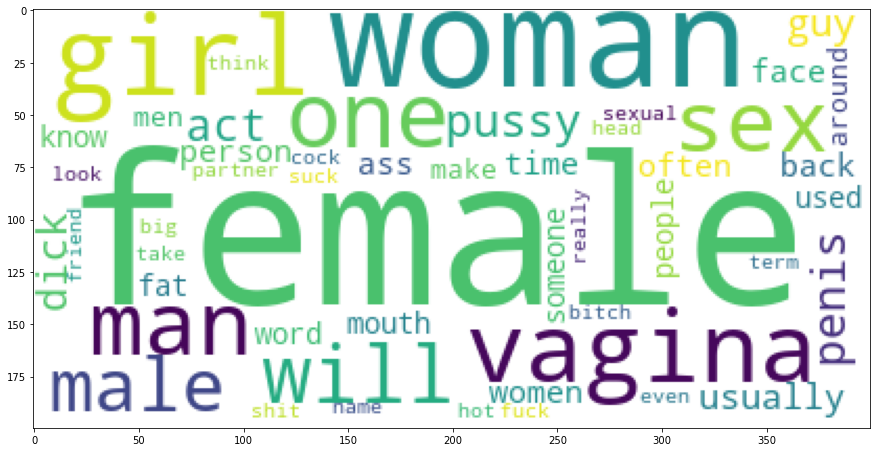

In [20]:
#plotting misogynistic WordCloud

plt.figure(figsize = (15,10))
plt.imshow(m_wordcloud)

In [21]:
#creating string to generate non misogynistic WordCloud

not_misogynistic_string = " ".join(not_misogynistic['cleaned_definition'])
not_misogynistic_string

'ur gonna die queer valuptuous man boobs variation of brother very impressive penis what i call my penis what a real man eats what every man fears what i named my dick when a gay guy farts when a man ejaculates when a man jacks off when man gets a boner when two bros frolic when you gay and ugly whip it out a penis who the fuck is that who ate all the pies who cares its fake young bisexual male buttsex rearranged cum bubble thera penis up the butt short dick syndrome a vampire brothel a batty riders penis a beaner who is a fob a big jewish softcock a black persons cock a bonham w a 2 cock a bro taking a shower a bro who is retarded a broke mans cadillac a broken glass bottle a brown skined person a burnt severed penis a chineese black man  a codename for penis a complete cock block a complete homosexual a complex sexual move a damn sexy beast etc a dirty niggers cock a drizzle of gizcum a extremely gay thing a fag or a homosexual a fart from the penis a flamboyant gay male a flaming ho

In [22]:
#generating non-misogynistic WordCloud object

nm_wordcloud = WordCloud(background_color = 'white', max_words = 50).generate(not_misogynistic_string)

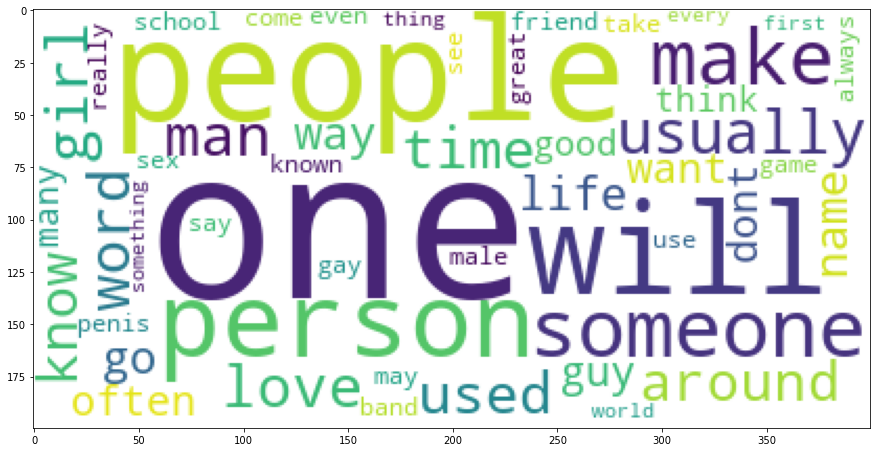

In [23]:
#plotting non-misogynistic WordCloud

plt.figure(figsize = (15,10))
plt.imshow(nm_wordcloud)

In [24]:
#declaring the set of stopwords into a variable and printing them to get an idea of what they are

stopwords = set(STOPWORDS)
print(STOPWORDS)

{'nor', 'for', 'should', "aren't", 'any', 'the', 'our', 'com', 'than', 'other', 'it', 'until', 'about', 'so', 'be', 'why', "they've", 'with', "she'd", 'again', 'had', 'would', 'else', 'could', 'both', "let's", "wouldn't", "weren't", "mustn't", 'further', "hadn't", "i'm", 'he', 'who', 'how', 'herself', 'itself', 'these', 'are', 'too', 'has', "he'll", 'also', "shan't", "she's", 'own', 'do', 'into', 'i', "you're", "they'd", 'while', 'www', 'up', 'there', "isn't", "he'd", 'out', 'him', 'cannot', 'by', 'doing', "it's", 'ought', "won't", 'such', 'ourselves', "you've", 'under', "don't", 'her', "doesn't", 'we', 'been', "who's", 'all', "you'd", 'they', 'his', 'its', 'those', 'in', 'when', "we'll", 'your', "he's", 'through', 'above', 'at', "you'll", 'my', "we've", 'most', 'some', 'yourselves', 'whom', 'himself', 'on', 'is', "we'd", 'have', 'if', 'get', 'down', 'and', "haven't", 'once', 'that', 'each', "they're", "she'll", 'after', 'off', 'did', 'does', 'like', "we're", 'during', 'over', 'yoursel

In [25]:
#splitting the strings to extract individual words. What the code does: for lambda x, where x is split into individual words, return the item if item is not in stopwords. apply this function to the whole dataframe using the .map() method

no_stop = misogyny['cleaned_definition'].map(lambda x: [item for item in x.split() if item not in stopwords])
no_stop = [" ".join(x) for x in no_stop]
no_stop

['ur gonna die queer',
 'valuptuous man boobs',
 'variation brother',
 'impressive penis',
 'call penis',
 'real man eats',
 'every man fears',
 'named dick',
 'gay guy farts',
 'man ejaculates',
 'man jacks',
 'man gets boner',
 'two bros frolic',
 'gay ugly',
 'whip penis',
 'fuck',
 'ate pies',
 'cares fake',
 'young bisexual male',
 'buttsex rearranged',
 'slang lesbian',
 'cum bubble thera',
 'penis butt',
 'short dick syndrome',
 'vampire brothel',
 'babys vaginal lips',
 'batty riders penis',
 'beaner fob',
 'big jewish softcock',
 'black persons cock',
 'bonham w 2 cock',
 'bro taking shower',
 'bro retarded',
 'broke mans cadillac',
 'broken glass bottle',
 'brown girls bosom',
 'brown skined person',
 'burnt severed penis',
 'chineese black man',
 'codename penis',
 'complete cock block',
 'complete homosexual',
 'complex sexual move',
 'damn sexy beast etc',
 'dirty niggers cock',
 'drizzle gizcum',
 'extremely gay thing',
 'fag homosexual',
 'fart penis',
 'flamboyant gay m

In [26]:
misogyny['cleaned_definition_nostop'] = no_stop
misogyny

,Definition,is_misogyny,cleaned_definition,cleaned_definition_nostop
0,Ur gonna die... queer,0.0,ur gonna die queer,ur gonna die queer
1,Valuptuous man boobs.,0.0,valuptuous man boobs,valuptuous man boobs
2,Variation of brother.,0.0,variation of brother,variation brother
3,Very impressive penis,0.0,very impressive penis,impressive penis
4,What I call my penis.,0.0,what i call my penis,call penis
...,...,...,...,...
2281,"A women who is ""easy""",1.0,a women who is easy,women easy
2282,Any hot/ sexy chicks.,1.0,any hot sexy chicks,hot sexy chicks
2283,Any vaginal secretion,1.0,any vaginal secretion,vaginal secretion
2284,Person who slaps hoes,1.0,person who slaps hoes,person slaps hoes


In [27]:
#instantiate the TfidfVectorizer

vectorizer = TfidfVectorizer()

In [28]:
#fit_transform the 

transformed = vectorizer.fit_transform(misogyny['cleaned_definition_nostop'])

In [29]:
#turning the sparse matrix after fit_transform of the data into a pandas dataframe. set the columns to actual words

transformed1 = pd.DataFrame(transformed.toarray(), columns = vectorizer.vocabulary_)
transformed1

,ur,gonna,die,queer,valuptuous,man,boobs,variation,brother,impressive,...,mechanical,spouted,jennifer,aniston,anistons,heartshaped,texting,cooler,peens,secretion
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2282,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2284,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#Checking distribution of each word
transformed1.sum()

ur             0.125679
gonna          0.150275
die            0.123988
queer          0.123988
valuptuous     0.068951
                 ...   
heartshaped    0.047098
texting        0.271176
cooler         0.240127
peens          0.057884
secretion      0.105707
Length: 16289, dtype: float64

In [31]:
#preparing the independent variables
independent_variable = transformed1.copy()

In [32]:
#preparing the dependent variables
dependent_variable = misogyny['is_misogyny']

In [33]:
#splitting the dataset using train_test_split

X_train, X_test, y_train, y_test = train_test_split(independent_variable, dependent_variable, test_size = 0.2, stratify = dependent_variable)

In [34]:
#fitting the dataset with the DummyClassifier() model

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
print(f1_score(dummy_pred, y_test))
confusion_matrix(dummy_pred, y_test) #the number of false negatives and false positives are too high

0.4668192219679634


/opt/anaconda3/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


array([[123, 105],
       [128, 102]])

In [35]:
#fitting the dataset with the LogisticRegression() model

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
print(f1_score(logreg_pred, y_test))
confusion_matrix(logreg_pred, y_test) #this model works much better than the dummy classifier

0.8296703296703296


array([[245,  56],
       [  6, 151]])

In [36]:
#fitting the dataset with the DecisionTreeClassifier() model

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print(f1_score(tree_pred, y_test))
confusion_matrix(tree_pred, y_test) #this model works quite well

0.8337349397590362


array([[216,  34],
       [ 35, 173]])

In [37]:
#fitting the dataset with the RandomForestClassifier() model

forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print(f1_score(forest_pred, y_test))
confusion_matrix(forest_pred, y_test) #this model works quite well

0.8769230769230769


array([[239,  36],
       [ 12, 171]])

In [38]:
feature_importance = pd.DataFrame(transformed1.columns, columns = ["feature"])
feature_importance['importance'] = forest.feature_importances_
feature_importance.sort_values(by = 'importance', ascending = False)

,feature,importance
15345,bun,0.060134
5297,queersespecially,0.051758
11342,vacation,0.032487
15967,ybanging,0.025973
10422,bustling,0.014641
...,...,...
7118,pervasive,0.000000
7119,cocaine,0.000000
7121,bisexuality,0.000000
7122,glamorama,0.000000


In [59]:
#creating a function that takes in a list of strings, and the model that you want to use

def is_it_misogynistic(strings, model):
    classification = []
    
    #transforming the input strings based on model that's already fit on train data
    strings_vectorized = vectorizer.transform(strings)
    #converting data into Pandas DataFrame
    strings_vectorized = pd.DataFrame(strings_vectorized.toarray(), columns = vectorizer.vocabulary_)
    #predicting the results based on earlier categorized 1 = Misogynistic, 0 = Not Misogynistic
    prediction = model.predict(strings_vectorized)
    #creating prediction as list
    prediction = list(prediction)
    prediction = ['Misogynistic' if i == 1 else 'Not Misogynistic' for i in prediction]

    #returning a dataframe showing the input string and the predicted classification
    return pd.DataFrame(zip(strings,prediction), columns = ['Sentence', 'Result'], index = None)

In [62]:
#testing the model out with input from the user

def1 = input("What is the first sentence?: ")
def2 = input("What is the second sentence?: ")
def3 = input("What is the third sentence?: ")

string_list = [def1,def2,def3]
string_list

is_it_misogynistic(string_list, forest)

What is the first sentence?: women are stupid
What is the second sentence?: what is the weather today?
What is the third sentence?: i like fried chicken


,Sentence,Result
0,women are stupid,Misogynistic
1,what is the weather today?,Not Misogynistic
2,i like fried chicken,Not Misogynistic


In [49]:
#transforming the input strings based on model that's already fit on train data
strings_vectorized = vectorizer.transform(string_list)
#converting data into Pandas DataFrame
strings_vectorized = pd.DataFrame(strings_vectorized.toarray(), columns = vectorizer.vocabulary_)
#predicting the results based on earlier categorized 1 = Misogynistic, 0 = Not Misogynistic
prediction = forest.predict(strings_vectorized)
    
prediction = list(prediction)
prediction

[0.0, 0.0, 0.0]